# This file generates all figures from the Effective Markovian Projection Paper

Load all functionalities

In [1]:
import autograd.numpy as np
import warnings
import set_parametrization as set_param
import emp_figure_maker as fig_maker
import helper_functions
from Helper.Normal_Vol import volBachelier as vb
from EMP_Algorithms import emp_mp_algorithm as emp_mp
from EMP_Algorithms import emp_np_algorithm as emp_np
from EMP_Algorithms import emp_atm_algorithm as emp_atm
from EMP_Algorithms import emp_base_setting as emp_base
from IR_Examples import IR_spread_options as spread_pricing
from IR_Examples import IR_midcurve_options as midcurve_pricing
from IR_Examples import IR_rate_calibration as calibration

Set common parameter for the first figures

In [2]:
T_fitting = 1 #Fitting maturity for the EMP
strikes = np.arange(0.001, 0.02, 0.0002) #Considered strikes

# parameters PDE scheme 
nsteps = 160
tsteps = 20
nd = 5

# Figure 1

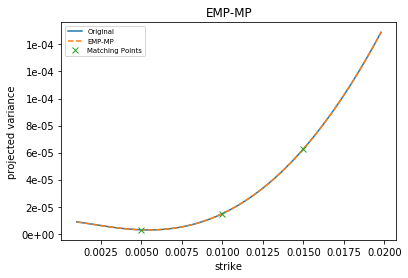

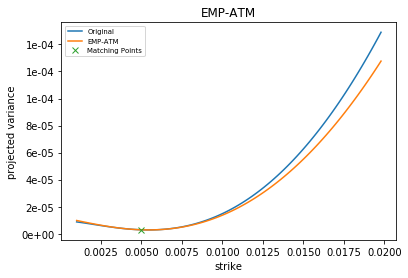

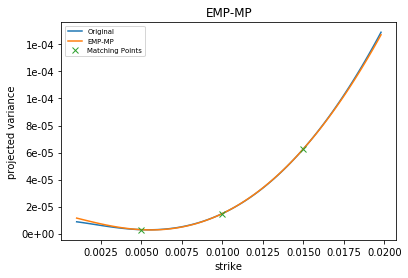

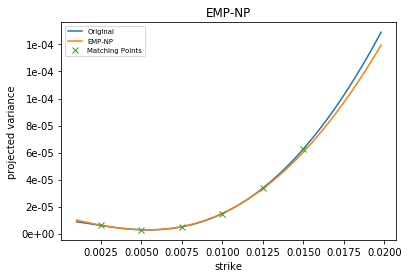

In [3]:
# Specify the parametrization
set_number = 1 
case = 2 

# Save the projected volatilites
locvol_curves_fitting = np.empty((len(strikes),5)) 
table_curves = np.empty((7,3)) 

# Load parameter set
params = set_param.set_ZABR_standard_parameters(set_number,case)
T = set_param.get_set_maturity(set_number)

# ZABR reference set
locvol_curves_fitting[:,0] = emp_base.get_emp_locvol(T_fitting, strikes, params)   #ZABR


####### EMP Fitting #######

# Parametrization of the dSABR as projection model  
dSABR_displacement = 0.002
dSABR_beta = 0.4

# Alternative parametrization of the dSABR as projection model  
dSABR_displacement_other = 0.003
dSABR_beta_other = 0.3 

# EMP-ATM fitting 
params_EMP_nSABR_ATM = emp_atm.eff_SABR_parameters_ATM(T_fitting, dSABR_displacement_other,
                                                        dSABR_beta_other, params)
locvol_curves_fitting[:,2] = emp_base.get_emp_locvol(T_fitting,strikes, params_EMP_nSABR_ATM)   

# EMP-NP fitting 
params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, dSABR_displacement_other, dSABR_beta_other, params)
locvol_curves_fitting[:,3] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_NP)   

# EMP-MP fitting 
params_EMP_nSABR_other = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                               dSABR_displacement_other, dSABR_beta_other, params)
locvol_curves_fitting[:,4] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_other)   

# EMP-MP fitting with alternative projection model
params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                            dSABR_displacement, dSABR_beta, params)
locvol_curves_fitting[:,1] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_MP)  


####### Comparison Points #######

#ATM crosses
x_value_figure_1_ATM  = np.array([params.forward])
x_value_locvol_figure_1_ATM = emp_base.get_emp_locvol(T_fitting,x_value_figure_1_ATM,params)

#MP-2-3 crosses
x_value_figure_1_MP_2_3  = np.array([params.forward, 2*params.forward, 3*params.forward])
x_value_locvol_figure_1_MP_2_3 = emp_base.get_emp_locvol(T_fitting, x_value_figure_1_MP_2_3, params)

#NP crosses
x_value_figure_1_NP  = np.array([0.5*params.forward, params.forward,
                                 1.5*params.forward, 2*params.forward,
                                 2.5*params.forward, 3*params.forward])
x_value_locvol_figure_1_NP = emp_base.get_emp_locvol(T_fitting,x_value_figure_1_NP,params)


####### Figures #######
fig_maker.make_figure_1_MP_dashed(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_MP_2_3,
                               x_value_locvol_figure_1_MP_2_3)
fig_maker.make_figure_1_and_2_ATM(set_number, strikes,locvol_curves_fitting,
                                x_value_figure_1_ATM,
                                x_value_locvol_figure_1_ATM)
fig_maker.make_figure_1_and_2_MP_alternative(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_MP_2_3,
                               x_value_locvol_figure_1_MP_2_3)
fig_maker.make_figure_1_and_2_NP(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_NP,
                               x_value_locvol_figure_1_NP)


# Figure 2

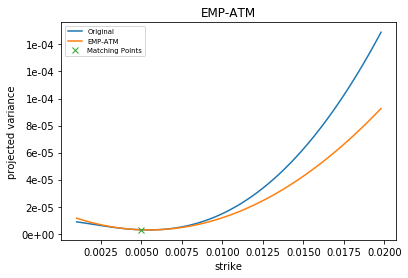

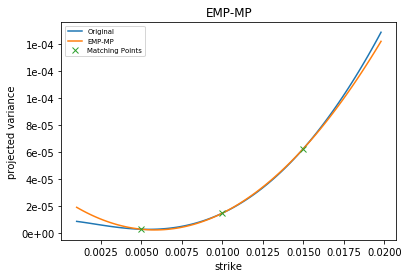

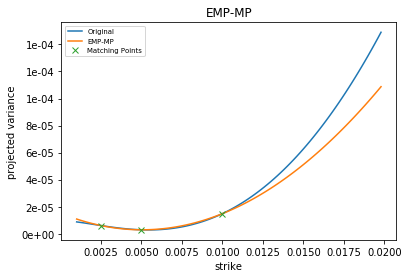

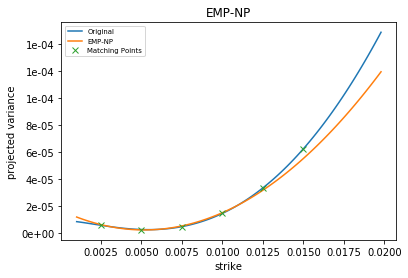

In [4]:
# Specify the parametrization
set_number = 1 
case = 2 

# Save the projected volatilites
locvol_curves_fitting = np.empty((len(strikes),5))
table_curves = np.empty((7,3))
    
# Load parameter set
params = set_param.set_ZABR_standard_parameters(set_number,case)
T = set_param.get_set_maturity(set_number)

# ZABR reference set
locvol_curves_fitting[:,0] = emp_base.get_emp_locvol(T_fitting, strikes, params)   #ZABR


####### EMP Fitting ######

# Parametrization of the nSABR as projection model 
n_sabr_displacement = 0
n_sabr_beta = 0

# EMP-MP fitting
params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                            n_sabr_displacement,n_sabr_beta, params)
locvol_curves_fitting[:,1] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_MP)

# EMP-ATM fitting
params_EMP_nSABR_ATM = emp_atm.eff_SABR_parameters_ATM(T_fitting, n_sabr_displacement,n_sabr_beta, params)
locvol_curves_fitting[:,2] = emp_base.get_emp_locvol(T_fitting,strikes, params_EMP_nSABR_ATM) 

# EMP-NP fitting
params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement,n_sabr_beta, params)
locvol_curves_fitting[:,3] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_NP) 

# EMP-MP fitting with alternative fitting points
params_EMP_nSABR_other = emp_mp.emp_mp_to_SABR(T_fitting, 0.5*params.forward, 2*params.forward,
                                               n_sabr_displacement,n_sabr_beta, params)
locvol_curves_fitting[:,4] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_other) 


####### Comparison Points #######

#ATM crosses
x_value_figure_1_ATM  = np.array([params.forward])
x_value_locvol_figure_1_ATM = emp_base.get_emp_locvol(T_fitting,x_value_figure_1_ATM,params)

#MP-2-3 crosses
x_value_figure_1_MP_2_3  = np.array([params.forward, 2*params.forward, 3*params.forward])
x_value_locvol_figure_1_MP_2_3 = emp_base.get_emp_locvol(T_fitting, x_value_figure_1_MP_2_3, params)

#MP-0.5-2 crosses
x_value_figure_1_MP_half_2  = np.array([params.forward, 0.5*params.forward, 2*params.forward])
x_value_locvol_figure_1_MP_half_2 = emp_base.get_emp_locvol(T_fitting,x_value_figure_1_MP_half_2,params)

#NP crosses
x_value_figure_1_NP  = np.array([0.5*params.forward, params.forward,
                                 1.5*params.forward, 2*params.forward,
                                 2.5*params.forward, 3*params.forward])
x_value_locvol_figure_1_NP = emp_base.get_emp_locvol(T_fitting,x_value_figure_1_NP,params)


####### Figures #######

fig_maker.make_figure_1_and_2_ATM(set_number, strikes,locvol_curves_fitting,
                                x_value_figure_1_ATM,
                                x_value_locvol_figure_1_ATM)
fig_maker.make_figure_1_and_2_MP(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_MP_2_3,
                               x_value_locvol_figure_1_MP_2_3)
fig_maker.make_figure_1_and_2_MP_alternative(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_MP_half_2,
                               x_value_locvol_figure_1_MP_half_2)
fig_maker.make_figure_1_and_2_NP(set_number,strikes,locvol_curves_fitting,
                               x_value_figure_1_NP,
                               x_value_locvol_figure_1_NP)


# Figure 3

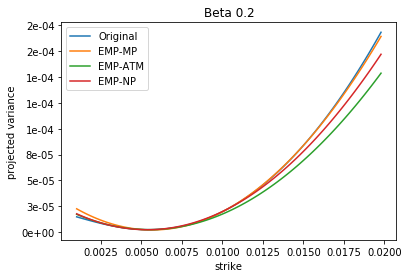

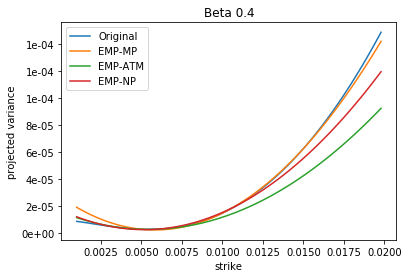

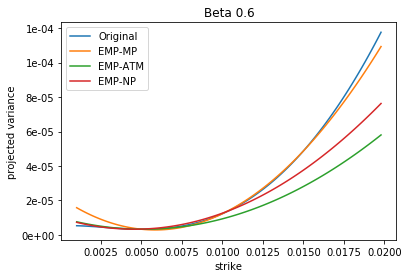

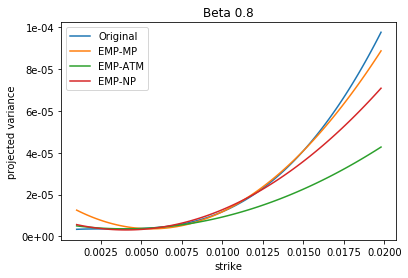

In [5]:
# Specify the parametrization
set_number = 1
Case_set  = [1,2,3,4]
T = set_param.get_set_maturity(set_number)

# Save the projected volatilites
locvol_curves_fitting = np.empty((len(strikes),len(Case_set),4))
locvol_curves = np.empty((len(strikes),len(Case_set),4))


####### EMP Fitting ######

# Consider 4 different cases for each set
for case in Case_set:
    # Load the parametrization in accordance to Table 3
    params = set_param.set_ZABR_standard_parameters(set_number,case)
    
    # set displacement for the SABR model
    n_sabr_displacement = 4*params.forward
    
    # EMP-MP fitting along T = 1
    params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                                n_sabr_displacement, 0, params)
    
    # EMP-NP fitting along T = 1
    params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, 0, params)
    
    # EMP-ATM fitting along T = 1
    params_EMP_nSABR_ATM = emp_atm.eff_SABR_parameters_ATM(T_fitting, n_sabr_displacement, 0, params)
    
    
    # locvol for desired maturity
    locvol_curves[:,case-1,0] = emp_base.get_emp_locvol(T_fitting, strikes, params)   #ZABR
    locvol_curves[:,case-1,1] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_MP)   #nSABR MP
    locvol_curves[:,case-1,2] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_ATM)   #nSABR ATM
    locvol_curves[:,case-1,3] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_NP)   #nSABR NP
    
    
####### Figures #######   

fig_maker.make_figure_3(set_number,1,strikes,locvol_curves)
fig_maker.make_figure_3(set_number,2,strikes,locvol_curves)
fig_maker.make_figure_3(set_number,3,strikes,locvol_curves)
fig_maker.make_figure_3(set_number,4,strikes,locvol_curves)


# Figure 4

Figure 4 was created in a seperate file

# Figure 5

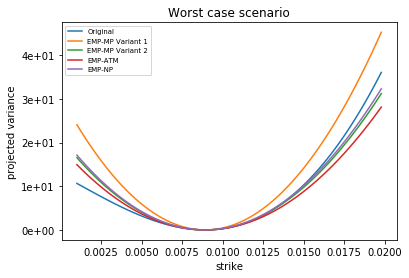

In [6]:
# Save the projected volatilites
locvol_curves_fitting_worst = np.empty((len(strikes),5))

# Load parameter set
params_worst = set_param.set_ZABR_worst_case_parameters()
T = 1


####### EMP Fitting ######

# Parametrization of the nSABR as projection model 
n_sabr_displacement = 0
n_sabr_beta = 0

# EMP-MP fitting along T = 1
params_EMP_nSABR_MP_worst = emp_mp.emp_mp_to_SABR(T_fitting, 2*params_worst.forward, 3*params_worst.forward,
                                                   n_sabr_displacement, n_sabr_beta, params_worst)

# EMP-NP fitting along T = 1
params_EMP_nSABR_NP_worst = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, n_sabr_beta, params_worst)

# EMP-ATM fitting along T = 1
params_EMP_nSABR_ATM_worst = emp_atm.eff_SABR_parameters_ATM(T_fitting, n_sabr_displacement, n_sabr_beta, params_worst)

# EMP-MP fitting along T = 1
params_EMP_nSABR_MP_worst_variant2 = emp_mp.emp_mp_to_SABR(T_fitting, 0.5*params_worst.forward, 
                                                            2*params_worst.forward, n_sabr_displacement,
                                                            n_sabr_beta, params_worst)


locvol_curves_fitting_worst[:,0] = emp_base.get_emp_locvol(T_fitting, strikes, params_worst)   
locvol_curves_fitting_worst[:,1] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_MP_worst)  
locvol_curves_fitting_worst[:,2] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_MP_worst_variant2)  
locvol_curves_fitting_worst[:,3] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_ATM_worst)  
locvol_curves_fitting_worst[:,4] = emp_base.get_emp_locvol(T_fitting, strikes, params_EMP_nSABR_NP_worst) 


####### Figures ####### 

fig_maker.make_figure_5(strikes,locvol_curves_fitting_worst)

# Figure 6

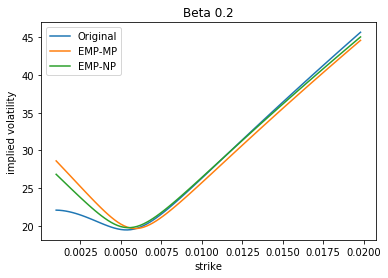

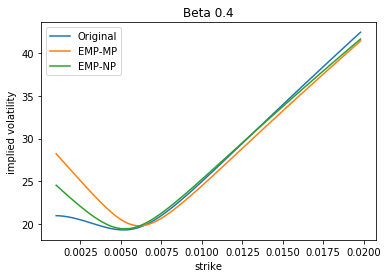

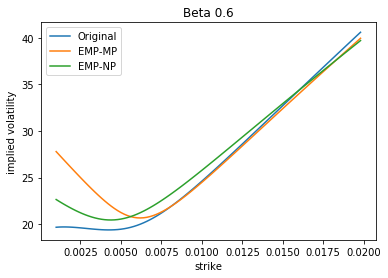

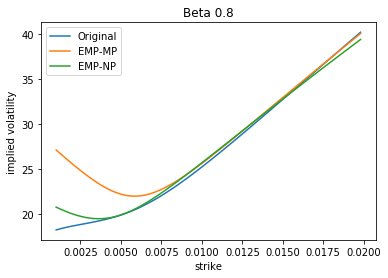

In [7]:
# Specify the parametrization
set_number = 1
Case_set  = [1,2,3,4]
T = set_param.get_set_maturity(set_number)

# Save the implied volatilites
iv_curves = np.empty((len(strikes),len(Case_set),3))


####### EMP Fitting and Computation ######

# Consider 4 different cases for each set
for case in Case_set:
    # Load the parametrization in accordance to Table 3
    params = set_param.set_ZABR_standard_parameters(set_number,case)
    
    # set displacement for the SABR model
    n_sabr_displacement = 4*params.forward
    
    # EMP-MP fitting along T = 1
    params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                                n_sabr_displacement, 0, params)
    
    # EMP-NP fitting along T = 1
    params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, 0, params)
       

    # ZABR Hagan 1d PDE 
    zabr_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params)
    iv_curves[:,case-1,0] = np.array(zabr_iv*10000)
    
    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_MP)
    iv_curves[:,case-1,1] = np.array(nSABR_iv*10000)

    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv_N = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_NP)
    iv_curves[:,case-1,2] = np.array(nSABR_iv_N*10000)
  
    
####### Figures ####### 

fig_maker.make_figure_6_to_9(set_number, 1, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 2, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 3, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 4, strikes,iv_curves)     

In the case where beta = 0.6, the otimization for the EMP-NP did not properly converge. Using a refinement of the optimization or a different initial value yields better results.

# Figure 7

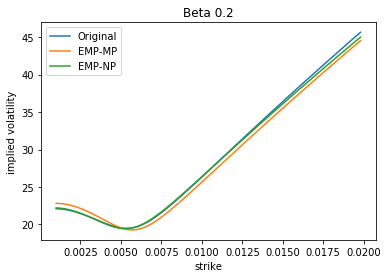

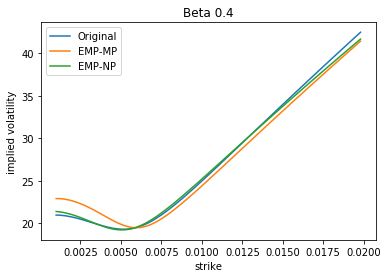

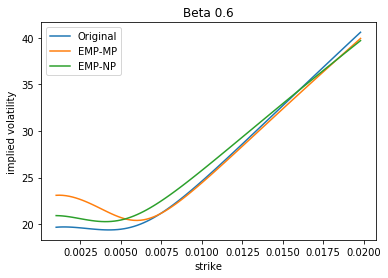

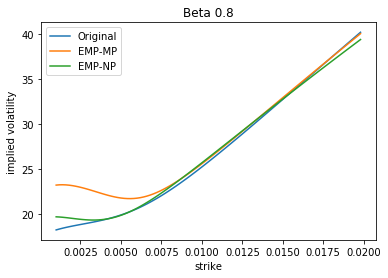

In [8]:
# Specify the parametrization
set_number = 1
Case_set  = [1,2,3,4]
T = set_param.get_set_maturity(set_number)

# Save the implied volatilites
iv_curves = np.empty((len(strikes),len(Case_set),3))


####### EMP Fitting and Computation ######

# Consider 4 different cases for each set
for case in Case_set:
    # Load the parametrization in accordance to Table 3
    params = set_param.set_ZABR_standard_parameters(set_number,case)
    
    # set displacement for the SABR model
    n_sabr_displacement = params.displacement
    
    # EMP-MP fitting along T = 1
    params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                                n_sabr_displacement, 0, params)
    
    # EMP-NP fitting along T = 1
    params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, 0, params)
       

    # ZABR Hagan 1d PDE 
    zabr_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params)
    iv_curves[:,case-1,0] = np.array(zabr_iv*10000)
    
    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_MP)
    iv_curves[:,case-1,1] = np.array(nSABR_iv*10000)

    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv_N = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_NP)
    iv_curves[:,case-1,2] = np.array(nSABR_iv_N*10000)
  
    
####### Figures ####### 
    
fig_maker.make_figure_6_to_9(set_number, 1, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 2, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 3, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 4, strikes,iv_curves) 

# Figure 8

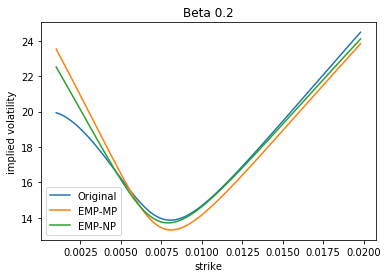

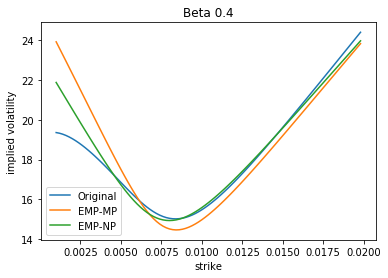

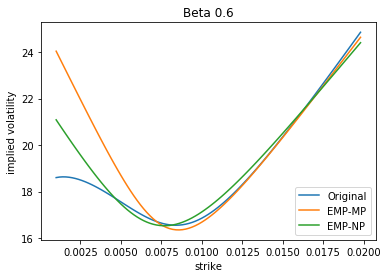

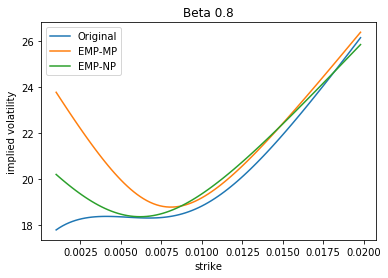

In [9]:
# Specify the parametrization
set_number = 2
Case_set  = [1,2,3,4]
T = set_param.get_set_maturity(set_number)

# Save the implied volatilites
iv_curves = np.empty((len(strikes),len(Case_set),3))


####### EMP Fitting and Computation ######

# Consider 4 different cases for each set
for case in Case_set:
    # Load the parametrization in accordance to Table 3
    params = set_param.set_ZABR_standard_parameters(set_number,case)
    
    # set displacement for the SABR model
    n_sabr_displacement = 4*params.forward
    
    # EMP-MP fitting along T = 1
    params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                                n_sabr_displacement, 0, params)
    
    # EMP-NP fitting along T = 1
    params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, 0, params)
      

    # ZABR Hagan 1d PDE 
    zabr_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params)
    iv_curves[:,case-1,0] = np.array(zabr_iv*10000)
    
    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_MP)
    iv_curves[:,case-1,1] = np.array(nSABR_iv*10000)

    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv_N = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_NP)
    iv_curves[:,case-1,2] = np.array(nSABR_iv_N*10000)
  
    
####### Figures ####### 
  
fig_maker.make_figure_6_to_9(set_number, 1, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 2, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 3, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 4, strikes,iv_curves) 

# Figure 9

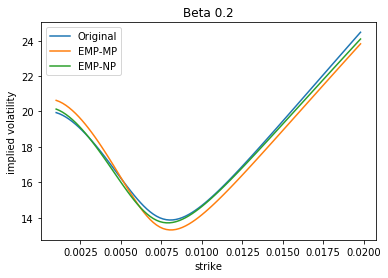

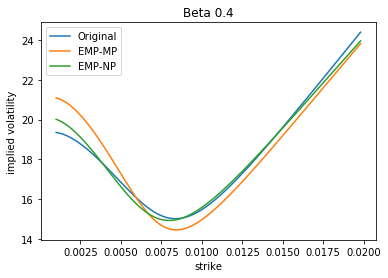

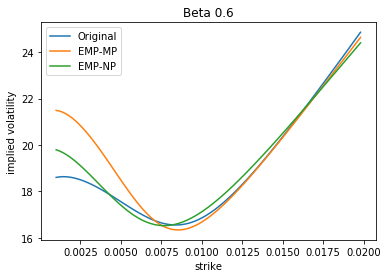

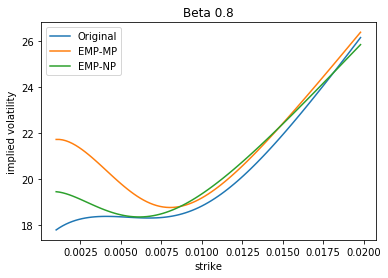

In [10]:
# Specify the parametrization
set_number = 2
Case_set  = [1,2,3,4]
T = set_param.get_set_maturity(set_number)

# Save the implied volatilites
iv_curves = np.empty((len(strikes),len(Case_set),3))


####### EMP Fitting and Computation ######

# Consider 4 different cases for each set
for case in Case_set:
    # Load the parametrization in accordance to Table 3
    params = set_param.set_ZABR_standard_parameters(set_number,case)
    
    # set displacement for the SABR model
    n_sabr_displacement = params.displacement
    
    # EMP-MP fitting along T = 1
    params_EMP_nSABR_MP = emp_mp.emp_mp_to_SABR(T_fitting, 2*params.forward, 3*params.forward,
                                                n_sabr_displacement, 0, params)
    
    # EMP-NP fitting along T = 1
    params_EMP_nSABR_NP = emp_np.emp_np_to_SABR(T_fitting, n_sabr_displacement, 0, params)
       

    # ZABR Hagan 1d PDE 
    zabr_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params)
    iv_curves[:,case-1,0] = np.array(zabr_iv*10000)
    
    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_MP)
    iv_curves[:,case-1,1] = np.array(nSABR_iv*10000)

    # nSABR minimal point Hagan 1d PDE 
    nSABR_iv_N = helper_functions.compute_hagan_pde_iv_curve(T,strikes,nsteps,tsteps,nd,params_EMP_nSABR_NP)
    iv_curves[:,case-1,2] = np.array(nSABR_iv_N*10000)
  
    
####### Figures ####### 

fig_maker.make_figure_6_to_9(set_number, 1, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 2, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 3, strikes,iv_curves)
fig_maker.make_figure_6_to_9(set_number, 4, strikes,iv_curves) 

# Figure 10

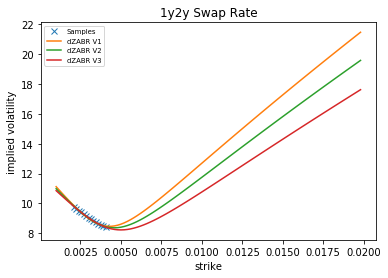

In [11]:
warnings.filterwarnings("ignore")

# The underlying tenor structure
T = 1 #The exercie date T = payment date T_0
T_1 = 2 #First rate is 1y2y 
T_2 = 5 #Second rate is 1y5y

# Sample market data
params_market_1y2y = set_param.set_market_parameters_1Y2Y()
atm_value_1y2y = params_market_1y2y.forward
calibration_points_1y2y = np.arange(0.7*atm_value_1y2y, 1.35*atm_value_1y2y,
                                    0.05*atm_value_1y2y)
temp, calibration_values_1y2y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y2y,params_market_1y2y)


####### EMP Fitting and Computation ######

# ZABR Rates 
iv_zabr_1y2y_curves = np.zeros((len(strikes),3))
for version_number in np.arange(1,4,1):
    # set initial parametrization
    params_zabr_1y2y = set_param.set_ZABR_parameters_1Y2Y(str("v"+str(version_number)))
    
    # calibrate the rate to market data
    params_calibrated_zabr_1y2y = calibration.calibrate_rate(T,calibration_points_1y2y,calibration_values_1y2y,
                                                             params_zabr_1y2y)
    
    # projection to nSABR using EMP-MP 
    params_EMP_calibrated_zabr_1y2y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y2y.forward,
                                                           3*params_calibrated_zabr_1y2y.forward,
                                                           4*params_calibrated_zabr_1y2y.forward,
                                                           0, params_calibrated_zabr_1y2y)
    
    # compute the iv
    temp, iv_zabr_1y2y =  spread_pricing.nSABR_vanilla_call(T,strikes,params_EMP_calibrated_zabr_1y2y)
    iv_zabr_1y2y_curves[:,version_number-1] = iv_zabr_1y2y


####### Figures ####### 

fig_maker.make_figure_10(calibration_points_1y2y,calibration_values_1y2y,
                         strikes,iv_zabr_1y2y_curves[:,0],iv_zabr_1y2y_curves[:,1],
                         iv_zabr_1y2y_curves[:,2])

# Figure 11

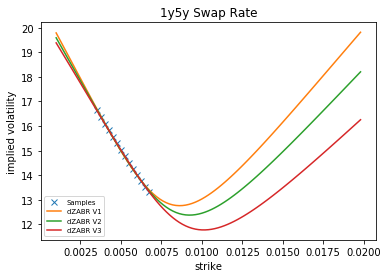

In [12]:
warnings.filterwarnings("ignore")

# The underlying tenor structure
T = 1 #The exercie date T = payment date T_0
T_1 = 2 #First rate is 1y2y 
T_2 = 5 #Second rate is 1y5y

# Sample market data
params_market_1y5y = set_param.set_market_parameters_1Y5Y()
atm_value_1y5y = params_market_1y5y.forward
calibration_points_1y5y = np.arange(0.7*atm_value_1y5y, 1.35*atm_value_1y5y,
                                    0.05*atm_value_1y5y)
temp, calibration_values_1y5y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y5y,params_market_1y5y)


####### EMP Fitting and Computation ######

# ZABR Rates 
iv_zabr_1y5y_curves = np.zeros((len(strikes),3))
for version_number in np.arange(1,4,1):
    # set initial parametrization
    params_zabr_1y5y = set_param.set_ZABR_parameters_1Y5Y(str("v"+str(version_number)))
    
    # calibrate the rate to market data
    params_calibrated_zabr_1y5y = calibration.calibrate_rate(T,calibration_points_1y5y,calibration_values_1y5y,
                                                             params_zabr_1y5y)
    
    # projection to nSABR using EMP-MP 
    params_EMP_calibrated_zabr_1y5y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y5y.forward,
                                                           3*params_calibrated_zabr_1y5y.forward,
                                                           4*params_calibrated_zabr_1y5y.forward,
                                                           0, params_calibrated_zabr_1y5y)
    
    # compute the iv
    temp, iv_zabr_1y5y =  spread_pricing.nSABR_vanilla_call(T,strikes,params_EMP_calibrated_zabr_1y5y)
    iv_zabr_1y5y_curves[:,version_number-1] = iv_zabr_1y5y


####### Figures #######

fig_maker.make_figure_11(calibration_points_1y5y,calibration_values_1y5y,
                         strikes,iv_zabr_1y5y_curves[:,0],iv_zabr_1y5y_curves[:,1],
                         iv_zabr_1y5y_curves[:,2])

# Figure 12

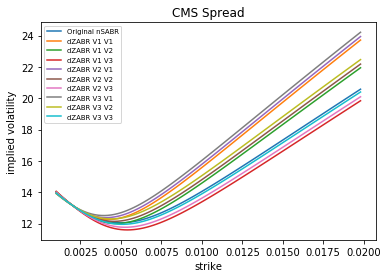

In [13]:
warnings.filterwarnings("ignore")

# The underlying tenor structure
T = 1 #The exercie date T = payment date T_0
T_1 = 2 #First rate is 1y2y 
T_2 = 5 #Second rate is 1y5y


####### Sampled Market Data ######

# Sample market data 1y2y
params_market_1y2y = set_param.set_market_parameters_1Y2Y()
atm_value_1y2y = params_market_1y2y.forward
calibration_points_1y2y = np.arange(0.7*atm_value_1y2y, 1.35*atm_value_1y2y,
                                    0.05*atm_value_1y2y)
temp, calibration_values_1y2y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y2y,params_market_1y2y)

# Sample market data 1y5y
params_market_1y5y = set_param.set_market_parameters_1Y5Y()
atm_value_1y5y = params_market_1y5y.forward
calibration_points_1y5y = np.arange(0.7*atm_value_1y5y, 1.35*atm_value_1y5y,
                                    0.05*atm_value_1y5y)
temp, calibration_values_1y5y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y5y,params_market_1y5y)

# sample spread data
corr_omega = 0.5
params_market_spread = spread_pricing.get_parameters_spread_general(
    -1,1,params_market_1y2y,params_market_1y5y,corr_omega,0)
atm_val_spread = params_market_spread.forward
calibration_points_spreads = np.arange(0.9*atm_val_spread, 1.12*atm_val_spread, 0.02*atm_val_spread)
call_market_spread = spread_pricing.compute_CMS_Spread_Caplet(T,calibration_points_spreads,params_market_spread,
                                                              params_market_1y2y, params_market_1y5y,
                                                              T_1,T_2)
calibration_values_spread = vb.vol_bachelier_diff_prices(1, calibration_points_spreads, params_market_spread.forward,
                                                       T, call_market_spread)
CMS_spread_price_market = spread_pricing.compute_CMS_Spread_Caplet(T,strikes,params_market_spread,
                                                                   params_market_1y2y, params_market_1y5y,
                                                                   T_1,T_2)
iv_market_spread = vb.vol_bachelier_diff_prices(1, strikes, params_market_spread.forward, T, CMS_spread_price_market)


####### EMP Fitting and Computation ######

# ZABR rates
iv_zabr_spread_curves = np.zeros((len(strikes),3,3))
for version_number_1y2y in np.arange(1,4,1):
    # set initial parametrization
    params_zabr_1y2y = set_param.set_ZABR_parameters_1Y2Y(str("v"+str(version_number_1y2y)))
    
    # calibrate the rate to market data
    params_calibrated_zabr_1y2y = calibration.calibrate_rate(T,calibration_points_1y2y,calibration_values_1y2y,
                                                             params_zabr_1y2y)
    
    # projection to nSABR using EMP-MP 
    params_EMP_calibrated_zabr_1y2y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y2y.forward,
                                                           3*params_calibrated_zabr_1y2y.forward,
                                                           4*params_calibrated_zabr_1y2y.forward,
                                                           0, params_calibrated_zabr_1y2y)
    
    for version_number_1y5y in np.arange(1,4,1):
        # set initial parametrization
        params_zabr_1y5y = set_param.set_ZABR_parameters_1Y5Y(str("v"+str(version_number_1y5y)))
        
        # calibrate the rate to market data
        params_calibrated_zabr_1y5y = calibration.calibrate_rate(T,calibration_points_1y5y,calibration_values_1y5y,
                                                             params_zabr_1y5y)
        
        # projection to nSABR using EMP-MP 
        params_EMP_calibrated_zabr_1y5y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y5y.forward,
                                                           3*params_calibrated_zabr_1y5y.forward,
                                                           4*params_calibrated_zabr_1y5y.forward,
                                                           0, params_calibrated_zabr_1y5y)
        
        # calibrate correlation
        calibrated_omega = calibration.calibrate_spread(corr_omega,T,calibration_points_spreads,
                                                        calibration_values_spread,
                                                        params_EMP_calibrated_zabr_1y2y,
                                                        params_EMP_calibrated_zabr_1y5y,
                                                        T_1,T_2)
        
        # parametrization for the spread
        params_spread_zabr = spread_pricing.get_parameters_spread_general(-1,1,params_EMP_calibrated_zabr_1y2y,
                                                            params_EMP_calibrated_zabr_1y5y,
                                                            calibrated_omega,0)
        
        # compute price
        price = spread_pricing.compute_CMS_Spread_Caplet(T,strikes,params_spread_zabr,
                                                        params_EMP_calibrated_zabr_1y2y,
                                                        params_EMP_calibrated_zabr_1y5y,
                                                        T_1,T_2)
        # compute iv
        iv = vb.vol_bachelier_diff_prices(1, strikes, params_spread_zabr.forward, T, price)
        iv_zabr_spread_curves[:,version_number_1y2y-1,version_number_1y5y-1] = iv 
    

####### Figures ######

fig_maker.make_figure_12(strikes,iv_market_spread,iv_zabr_spread_curves)

# Figure 13

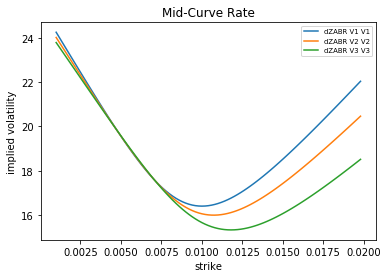

In [14]:
warnings.filterwarnings("ignore")

# The underlying tenor structure
T = 1 #The exercie date T = payment date T_0
T_1 = 2 #First rate is 1y2y 
T_2 = 5 #Second rate is 1y5y


####### Sampled Market Data ######

# Sample market data 1y2y
params_market_1y2y = set_param.set_market_parameters_1Y2Y()
atm_value_1y2y = params_market_1y2y.forward
calibration_points_1y2y = np.arange(0.7*atm_value_1y2y, 1.35*atm_value_1y2y,
                                    0.05*atm_value_1y2y)
temp, calibration_values_1y2y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y2y,params_market_1y2y)

# Sample market data 1y5y
params_market_1y5y = set_param.set_market_parameters_1Y5Y()
atm_value_1y5y = params_market_1y5y.forward
calibration_points_1y5y = np.arange(0.7*atm_value_1y5y, 1.35*atm_value_1y5y,
                                    0.05*atm_value_1y5y)
temp, calibration_values_1y5y = spread_pricing.nSABR_vanilla_call(
    T,calibration_points_1y5y,params_market_1y5y)


####### EMP Fitting and Computation ######

# ZABR rates
iv_zabr_midcurve_curves = np.zeros((len(strikes),3))
calibration_points_midcurve_rates = np.arange(0.002, 0.02, 0.001)
for version_number in np.arange(1,4,1):
    # set initial parametrization
    params_zabr_1y2y = set_param.set_ZABR_parameters_1Y2Y(str("v"+str(version_number)))
    
    # calibrate the rate to market data
    params_calibrated_zabr_1y2y = calibration.calibrate_rate(T,calibration_points_1y2y,calibration_values_1y2y,
                                                             params_zabr_1y2y)
    
    # projection to nSABR using EMP-MP 
    params_EMP_calibrated_zabr_1y2y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y2y.forward,
                                                           3*params_calibrated_zabr_1y2y.forward,
                                                           4*params_calibrated_zabr_1y2y.forward,
                                                           0, params_calibrated_zabr_1y2y)
    
    
    calibration_values_midcurve_rates_1y2y = midcurve_pricing.compute_iv_original_rate(
        calibration_points_midcurve_rates,T,T_1,T,T_1,T_2, params_EMP_calibrated_zabr_1y2y)
    params_calibrated_midcurve_1y2y = calibration.calibrate_rate(T,calibration_points_midcurve_rates,
                                                                calibration_values_midcurve_rates_1y2y,
                                                                params_calibrated_zabr_1y2y)
    
    params_EMP_calibrated_midcurve_1y2y =  emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_midcurve_1y2y.forward,
                                                                    3*params_calibrated_midcurve_1y2y.forward,
                                                                    4*params_calibrated_midcurve_1y2y.forward,
                                                                    0, params_calibrated_midcurve_1y2y)

    ############### 1y5y ###############
    # set initial parametrization
    params_zabr_1y5y = set_param.set_ZABR_parameters_1Y5Y(str("v"+str(version_number)))
    
    # calibrate the rate to market data
    params_calibrated_zabr_1y5y = calibration.calibrate_rate(T,calibration_points_1y5y,calibration_values_1y5y,
                                                             params_zabr_1y5y)
    
    # projection to nSABR using EMP-MP 
    params_EMP_calibrated_zabr_1y5y = emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_zabr_1y5y.forward,
                                                           3*params_calibrated_zabr_1y5y.forward,
                                                           4*params_calibrated_zabr_1y5y.forward,
                                                           0, params_calibrated_zabr_1y5y)
    
    
    calibration_values_midcurve_rates_1y5y = midcurve_pricing.compute_iv_original_rate(
        calibration_points_midcurve_rates,T,T_1,T,T_1,T_2, params_EMP_calibrated_zabr_1y5y)
    params_calibrated_midcurve_1y5y = calibration.calibrate_rate(T,calibration_points_midcurve_rates,
                                                                calibration_values_midcurve_rates_1y5y,
                                                                params_calibrated_zabr_1y5y)
    
    params_EMP_calibrated_midcurve_1y5y =  emp_mp.emp_mp_to_SABR(T, 2*params_calibrated_midcurve_1y5y.forward,
                                                                    3*params_calibrated_midcurve_1y5y.forward,
                                                                    4*params_calibrated_midcurve_1y5y.forward,
                                                                    0, params_calibrated_midcurve_1y5y)
    
    
    # Annuity approximations
    A_mc = (T_2-T_1)
    A_1 = (T_1-T)
    A_2 = (T_2-T)

    weight_1 = -A_1/A_mc
    weight_2 = A_2/A_mc
    
    # calibrate correlation
    calibrated_omega = calibration.calibrate_spread(corr_omega,T,calibration_points_spreads,
                                                    calibration_values_spread,
                                                    params_EMP_calibrated_zabr_1y2y,
                                                    params_EMP_calibrated_zabr_1y5y,
                                                    T_1,T_2)
    
    params_midcurve_spread = spread_pricing.get_parameters_spread_general(weight_1, weight_2,
                                                                  params_EMP_calibrated_midcurve_1y2y,
                                                                  params_EMP_calibrated_midcurve_1y5y,
                                                                  calibrated_omega,0)
    
    
    price_calls_midcurve_zabr, temp = spread_pricing.nSABR_vanilla_call(T,strikes,params_midcurve_spread)
    iv_calls_midcurve_zabr_exp = vb.vol_bachelier_diff_prices(
        1, strikes, params_midcurve_spread.forward, T, price_calls_midcurve_zabr)

    iv_zabr_midcurve_curves[:,version_number-1] = iv_calls_midcurve_zabr_exp


####### Figures ######
fig_maker.make_figure_13(strikes,iv_zabr_midcurve_curves[:,0], iv_zabr_midcurve_curves[:,1],iv_zabr_midcurve_curves[:,2])